In [183]:
import re
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import matplotlib.pyplot as plt 
import nltk

In [184]:
#Increase output window size
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [185]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [186]:
train['label'].value_counts() #There are very few tweets with racist/negative comments

0    29720
1     2242
Name: label, dtype: int64

In [187]:
df = train.append(test, ignore_index = True, sort = True)
df.head(10)

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !


# Data Cleaning

In [188]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [217]:
# Remove @user handles
df['tidy_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")
df.head(5)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


## Remove punctuation

In [216]:
df['tidy_tweet'] = df['tidy_tweet'].str.replace("[^A-Za-z#]"," ")
df.head(5)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,father dysfunct selfish drag kid dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus offer wheelchair van #disapoint #getthank
2,3,0.0,bihday your majesty,bihday majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


## Remove Stopwords

In [ ]:
# Remove stopwords
from nltk.corpus import stopwords 
stopwords_list = stopwords.words('english')
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: ' '.join([i for i in x.split() if i not in stopwords_list]))

## Remove Shortwords

In [193]:
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: ' '.join([i for i in x.split() if len(i) > 3]))

## Tokenization

In [194]:
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: x.split())
df.head()

## from nltk import word_tokenize --We can also use nltk library for tokenization
## df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: word_tokenize(x))

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,"[father, dysfunctional, selfish, drags, kids, dysfunction, #run]"
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,"[thanks, #lyft, credit, cause, offer, wheelchair, vans, #disapointed, #getthanked]"
2,3,0.0,bihday your majesty,"[bihday, majesty]"
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,"[#model, love, take, time]"
4,5,0.0,factsguide: society now #motivation,"[factsguide, society, #motivation]"


## Stemming

In [195]:
from nltk.stem.porter import PorterStemmer
stemming = PorterStemmer()
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: ' '.join([stemming.stem(i) for i in x])) 
df.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,father dysfunct selfish drag kid dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus offer wheelchair van #disapoint #getthank
2,3,0.0,bihday your majesty,bihday majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


In [196]:
from wordcloud import wordcloud

In [197]:
Joinwords = ' '.join( i for i in df['tidy_tweet'])

In [198]:
from wordcloud import WordCloud

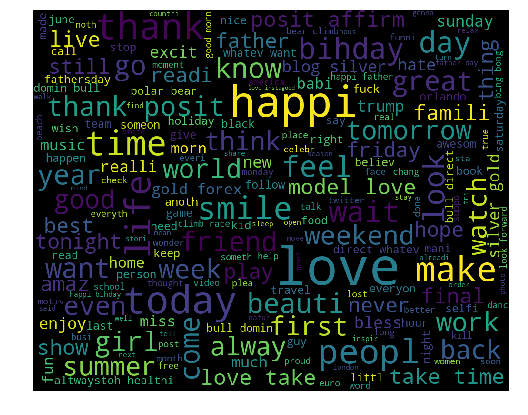

In [199]:
##Most repeated words used
wordcloud = WordCloud(width = 1000, height = 800, random_state = 21, max_font_size = 110).generate(Joinwords)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

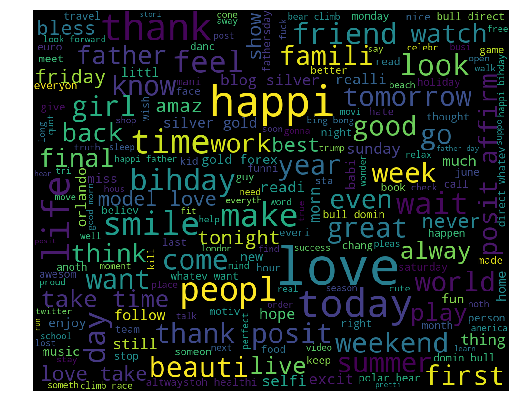

In [200]:
#Most Positive repeated words
Joinwords = ' '.join( [i for i in df.loc[df.label == 0.0,'tidy_tweet']])

wordcloud = WordCloud(width = 1000, height = 800, random_state = 21, max_font_size = 110).generate(Joinwords)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#Most Negative repeated words
Joinwords = ' '.join( [i for i in df.loc[df.label == 1.0,'tidy_tweet']])
wordcloud = WordCloud(width = 1000, height = 800, random_state = 21, max_font_size = 110).generate(Joinwords)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Make sense with hashtags:

In [201]:
def hashtag_words(input):
    hashtag = []
    for i in input:
        word = re.findall(r"#(\w+)", i)
        hashtag.append(word)
    return hashtag

In [202]:
Hash_normal = hashtag_words(df.loc[df['label'] == 0.0, 'tidy_tweet'])
Hash_negative = hashtag_words(df.loc[df['label'] == 1.0, 'tidy_tweet'])

In [203]:
HT_normal = sum(Hash_normal,[])
HT_negative = sum(Hash_negative,[])

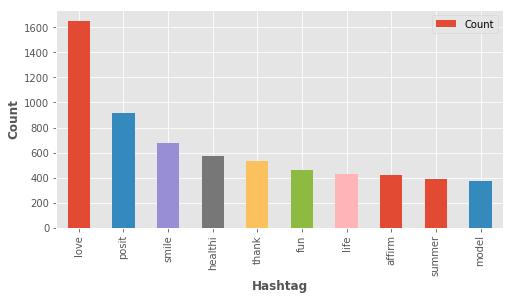

In [204]:
#Create a Dataframe: 
a = nltk.FreqDist(HT_normal)
data_normal = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())}).sort_values(by = ['Count'], ascending = False)
data_normal
data_normal = data_normal.head(10)
data_normal
#Plot Graph
import matplotlib
matplotlib.style.use('ggplot')
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["figure.figsize"] = [8, 4]
data_normal.plot(kind = 'bar',x = 'Hashtag', y = 'Count')
plt.xlabel('Hashtag', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

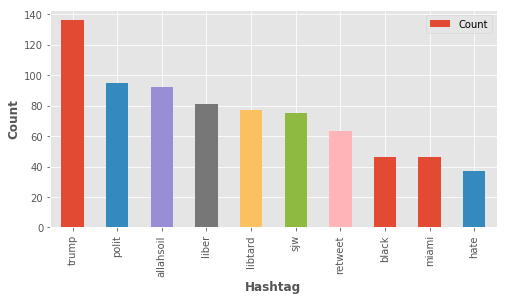

In [205]:
#Create a Dataframe: 
b = nltk.FreqDist(HT_negative)
data_negative = pd.DataFrame({'Hashtag': list(b.keys()),'Count': list(b.values())}).sort_values(by = ['Count'], ascending = False)
data_negative = data_negative.head(10)
data_negative
#Plot Graph
import matplotlib
matplotlib.style.use('ggplot')
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["figure.figsize"] = [8, 4]
data_negative.plot(kind = 'bar',x = 'Hashtag', y = 'Count')
plt.xlabel('Hashtag', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Feature Selection

## Bag of Words


In [206]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(analyzer='word',max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df['tidy_tweet'])
bow.shape

(49159, 1000)

## TF-IDF

In [207]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vectorizer = TfidfVectorizer(analyzer='word',max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tf_idf = tf_idf_vectorizer.fit_transform(df['tidy_tweet'])

## Word2Vec

In [208]:
import gensim

tweet_token = df['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tweet_token,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tweet_token, total_examples= len(df['tidy_tweet']), epochs=20)

#model = Word2Vec(sentences, workers=4) # default = 1 worker = no parallelization
#The workers parameter has only effect if you have Cython installed. Without Cython, you’ll only be able to use one core because of the GIL (and word2vec training will be miserably slow).

(5809778, 6601800)

In [209]:
words = list(model_prep.wv.vocab)
print(words)
print(len(words))

['father', 'dysfunct', 'selfish', 'drag', 'kid', '#run', 'thank', '#lyft', 'credit', 'caus', 'offer', 'wheelchair', 'van', '#getthank', 'bihday', 'majesti', '#model', 'love', 'take', 'time', 'factsguid', 'societi', '#motiv', 'huge', 'fare', 'talk', 'leav', 'chao', 'camp', 'tomorrow', 'danni', 'next', 'school', 'year', 'exam', 'think', '#school', '#exam', '#hate', '#imagin', '#actorslif', '#girl', 'land', '#allin', '#cav', '#champion', '#cleveland', 'welcom', '#ireland', 'consum', 'price', 'index', 'climb', 'previou', '#blog', '#silver', '#gold', '#forex', '#orlando', '#standwithorlando', '#pulseshoot', '#orlandoshoot', '#selfish', '#heabreak', '#valu', '#love', 'daddi', 'today', 'day', '#cnn', 'call', '#michigan', 'middl', 'build', 'wall', 'chant', '#tcot', 'comment', '#australia', '#opkillingbay', '#seashepherd', '#helpcovedolphin', '#thecov', 'ouch', 'junior', 'angri', '#got', '#junior', '#omg', 'paner', '#thank', '#posit', 'retweet', 'agre', '#friday', 'smile', 'around', 'user', '#c

In [210]:
def word_vector(sentence, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in sentence:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [211]:
wordvec_arrays = np.zeros((len(tweet_token), 200))

for i in range(len(tweet_token)):
    wordvec_arrays[i,:] = word_vector(tweet_token[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape    

C:\Users\abhinav.bohra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(49159, 200)

# Model Building

In [212]:
#USING BOW

train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

X_train, X_valid, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)
lg = LogisticRegression()

In [213]:
lg.fit(X_train,y_train)
prediction = lg.predict_proba(X_valid)
prediction = prediction[:,1] >= 0.3  #0.3 means correctly predicting 30% of data
#prediction = prediction.astype(np.int)
f1_score(y_valid, prediction)

0.5321100917431192

In [214]:
#USING TF-IDF

train_tf_idf = tf_idf[:31962,:]
test_tf_idf = tf_idf[31962:,:]

xtrain_tfidf = train_tf_idf[y_train.index]
xvalid_tfidf = train_tf_idf[y_valid.index]

lg.fit(xtrain_tfidf,y_train)
prediction = lg.predict_proba(xvalid_tfidf)
prediction = prediction[:,1] >= 0.3
f1_score(y_valid, prediction)

0.5464190981432361

In [215]:
#USING WORD2VEC

train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

lg.fit(xtrain_w2v, ytrain)

prediction = lg.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.6196581196581197

In [ ]:
test_pred = lg.predict_proba(test_w2v)
test_pred_int = test_pred[:,1] >= 0.3 
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file